# Main Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_10x_dl = os.path.join("..", "se", "..", "clean-files-dl", "aggr", "agg-cb-10.csv")
cf_10x_dl = os.path.join("..", "se", "..", "clean-files-dl", "aggr", "agg-cf-10.csv")
cb_5x_dl = os.path.join("..", "se", "..", "clean-files-dl", "aggr", "agg-cb-5.csv")
cf_5x_dl = os.path.join("..", "se", "..", "clean-files-dl", "aggr", "agg-cf-5.csv")
cb_1x_dl = os.path.join("..", "se", "..", "clean-files-dl", "aggr", "agg-cb-1.csv")
cf_1x_dl = os.path.join("..", "se", "..", "clean-files-dl", "aggr", "agg-cf-1.csv")

cb_10x_ul = os.path.join("..", "se", "..", "clean-files-ul", "aggr", "agg-cb-10-1.csv")
cf_10x_ul = os.path.join("..", "se", "..", "clean-files-ul", "aggr", "agg-cf-10.csv")
cb_5x_ul = os.path.join("..", "se", "..", "clean-files-ul", "aggr", "agg-cb-5.csv")
cf_5x_ul = os.path.join("..", "se", "..", "clean-files-ul", "aggr", "agg-cf-5.csv")
cb_1x_ul = os.path.join("..", "se", "..", "clean-files-ul", "aggr", "agg-cb-1.csv")
cf_1x_ul = os.path.join("..", "se", "..", "clean-files-ul", "aggr", "agg-cf-1-1.csv")

# Calculations for every file

#### 1x Scenarios

In [64]:
# Read content of the file
df_cb_1_dl = pd.read_csv(cb_1x_dl)
df_cf_1_dl = pd.read_csv(cf_1x_dl)
df_cb_1_ul = pd.read_csv(cb_1x_ul)
df_cf_1_ul = pd.read_csv(cf_1x_ul)

#### 5x Scenarios

In [ ]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (bits/s/Hz)"] = df_ue["Mean_SE"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_5_ul = read_data_by_ue(cb_5x_ul)
dfs_cf_5_ul = read_data_by_ue(cf_5x_ul)
dfs_cb_5_dl = read_data_by_ue(cb_5x_dl)
dfs_cf_5_dl = read_data_by_ue(cf_5x_dl)

#### 10x Scenarios

In [ ]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (bits/s/Hz)"] = df_ue["Mean_SE"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_10_ul = read_data_by_ue(cb_10x_ul)
dfs_cf_10_ul = read_data_by_ue(cf_10x_ul)
dfs_cb_10_dl = read_data_by_ue(cb_10x_dl)
dfs_cf_10_dl = read_data_by_ue(cf_10x_dl)

# Behavior Graphics 

## 1X Scenarios

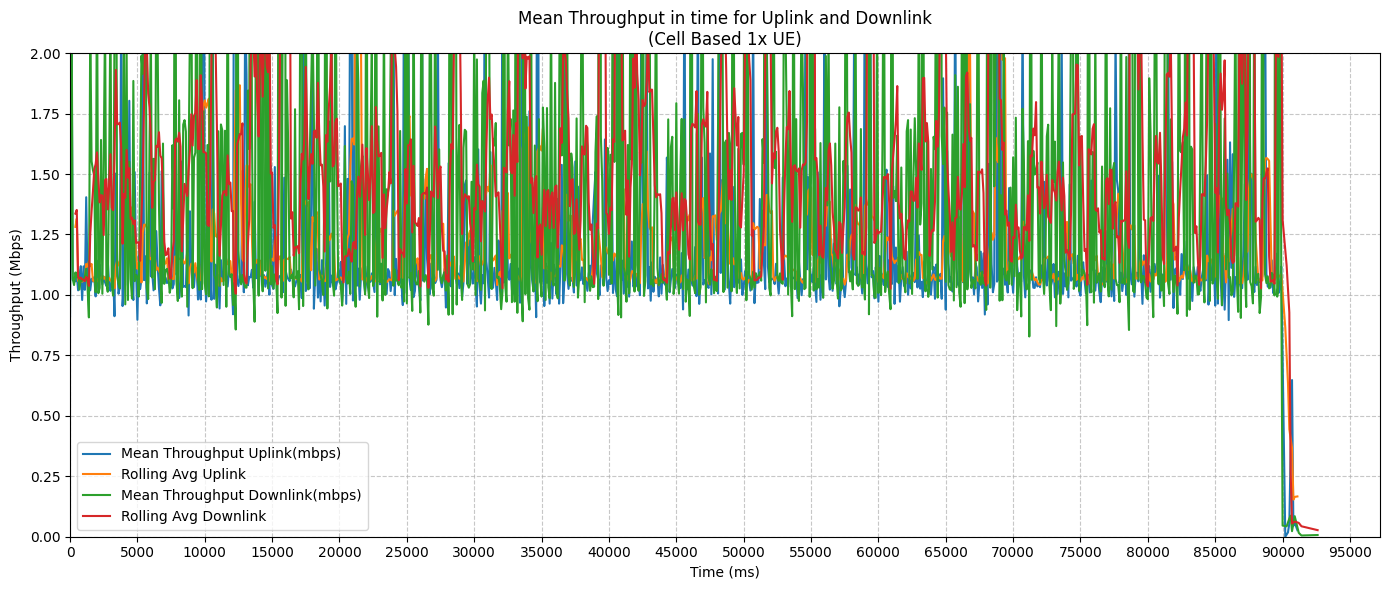

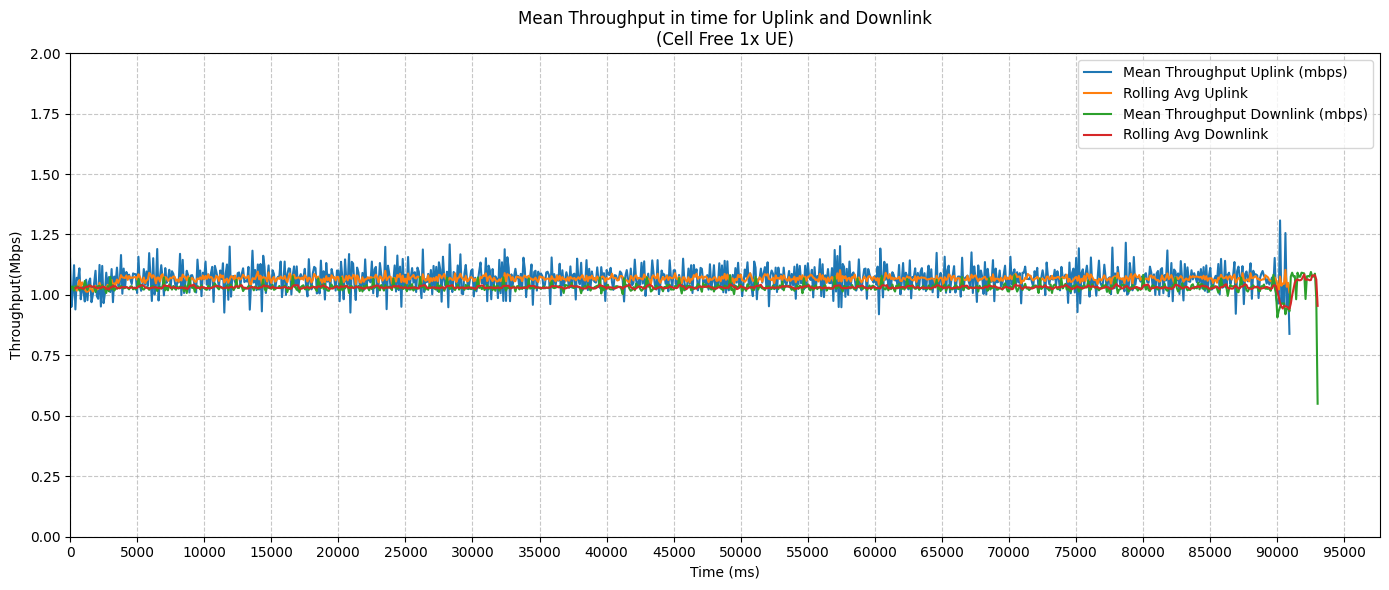

In [ ]:
# Round of SE values to 3 decimal places
df_cb_1_ul["Mean_SE"] = df_cb_1_ul["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_1_ul["Rolling Avg (bits/s/Hz)"] = df_cb_1_ul["Mean_SE"].rolling(window=5).mean()
df_cb_1_dl["Mean_SE"] = df_cb_1_dl["Mean_SE"].round(3)
df_cb_1_dl["Rolling Avg (bits/s/Hz)"] = df_cb_1_dl["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_SE", data=df_cb_1_ul, label="Mean SE Uplink(bits/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1_ul, label="Rolling Avg Uplink")
sns.lineplot(x="Time_ms", y="Mean_SE", data=df_cb_1_dl, label="Mean SE Downlink(bits/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1_dl, label="Rolling Avg Downlink")
plt.title("Mean SE in time for Uplink and Downlink\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE (bits/s/Hz)")
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Round of SE values to 3 decimal places
df_cf_1_ul["Mean_SEcf_1_ul["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_1_ul["Rolling Avg (bits/s/Hz)"] = df_cf_1_ul["Mean_SE"].rolling(window=5).mean()
# Round of SE values to 3 decimal places
df_cf_1_dl["Mean_SE"] = df_cf_1_dl["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_1_dl["Rolling Avg (bits/s/Hz)"] = df_cf_1_dl["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_SEdf_cf_1_ul, label="Mean SE Uplink (bits/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1_ul, label="Rolling Avg Uplink")
sns.lineplot(x="Time_ms", y="Mean_SEdf_cf_1_dl, label="Mean SE Downlink (bits/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1_dl, label="Rolling Avg Downlink")
plt.title("Mean SE in time for Uplink and Downlink\n(Cell Free 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE(bits/s/Hz)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print("\n-----Downlink-----\n")
print("\t -- Cell-Based -- ")
print(df_cb_1_dl["Mean_SE"].describe())
print("\t -- Cell-Free -- ")
print(df_cf_1_dl["Mean_SE"].describe())
print("\n-----Uplink-----\n")
print("\t -- Cell-Based -- ")
print(df_cb_1_ul["Mean_SE"].describe())
print("\t -- Cell-Free -- ")
print(df_cf_1_ul["Mean_SE"].describe())


-----Downlink-----

	 -- Cell-Based -- 
count    909.000000
mean       1.555864
std        1.097410
min        0.005000
25%        1.031000
50%        1.089000
75%        1.704000
max       17.623000
Name: Mean_Throughput, dtype: float64
	 -- Cell-Free -- 
count    930.000000
mean       1.030847
std        0.022997
min        0.550000
25%        1.024000
50%        1.031000
75%        1.037000
max        1.095000
Name: Mean_Throughput, dtype: float64

-----Uplink-----

	 -- Cell-Based -- 
count    907.000000
mean       1.191353
std        0.445191
min        0.000000
25%        1.036000
50%        1.073000
75%        1.129000
max        5.880000
Name: Mean_Throughput, dtype: float64
	 -- Cell-Free -- 
count    910.000000
mean       1.066745
std        0.052832
min        0.839000
25%        1.033000
50%        1.068000
75%        1.102000
max        1.308000
Name: Mean_Throughput, dtype: float64


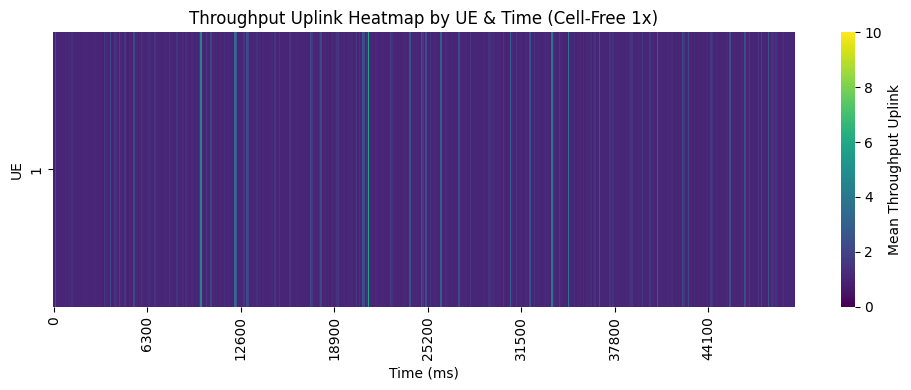

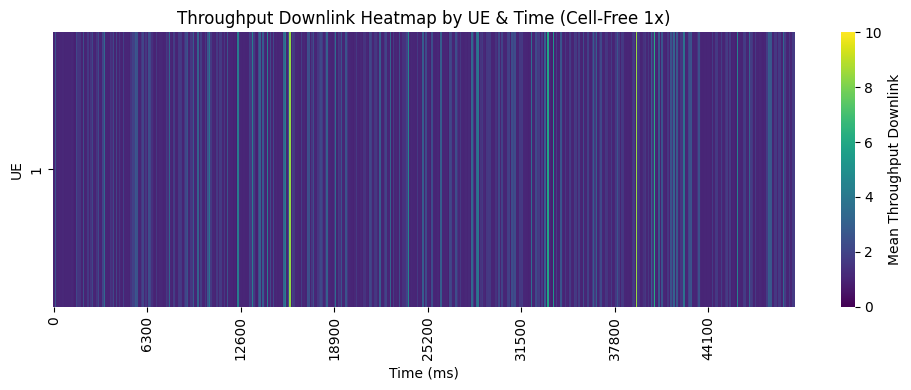

In [ ]:
heat_cb_ul = df_cb_1_ul.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf_ul = df_cf_1_ul.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cb_dl = df_cb_1_dl.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf_dl = df_cf_1_dl.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

vmin_val = 0
vmax_val = 10

# Plot Cell-Based
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cb_ul, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SE Uplink Heatmap by UE & Time (Cell-Free 1x)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(heat_cb_dl, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SE Downlink Heatmap by UE & Time (Cell-Free 1x)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

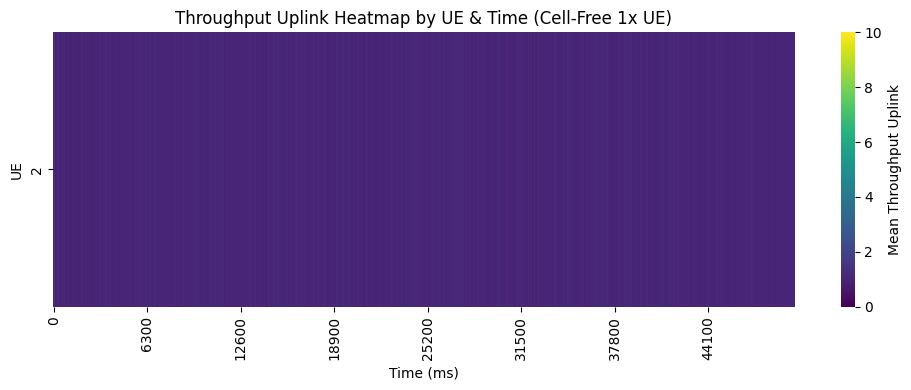

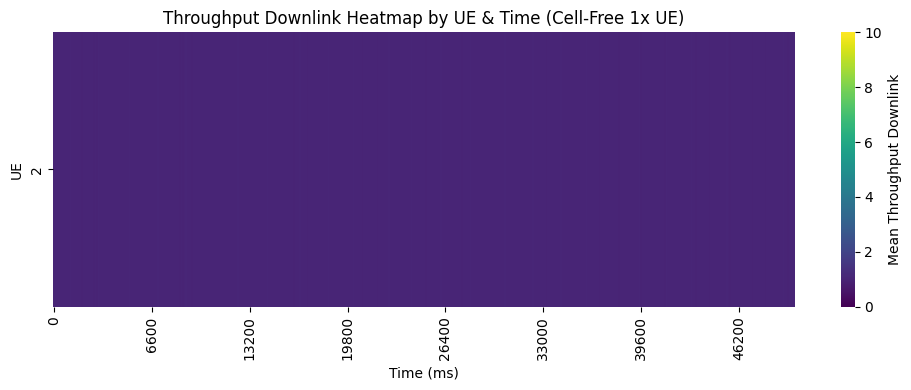

In [ ]:
vmin_val = 0
vmax_val = 10

# Plot Cell-Free
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cf_ul, cmap="viridis", cbar_kws={'label': 'Mean SE (bits/s/Hz)'},  vmin=vmin_val, vmax=vmax_val)
plt.title("SE Heatmap by UE & Time (Cell-Free 1x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

# Plot Cell-Free
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cf_dl, cmap="viridis", cbar_kws={'label': 'Mean SE (bits/s/Hz)'},  vmin=vmin_val, vmax=vmax_val)
plt.title("SE Heatmap by UE & Time (Cell-Free 1x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

## 5X Scenarios

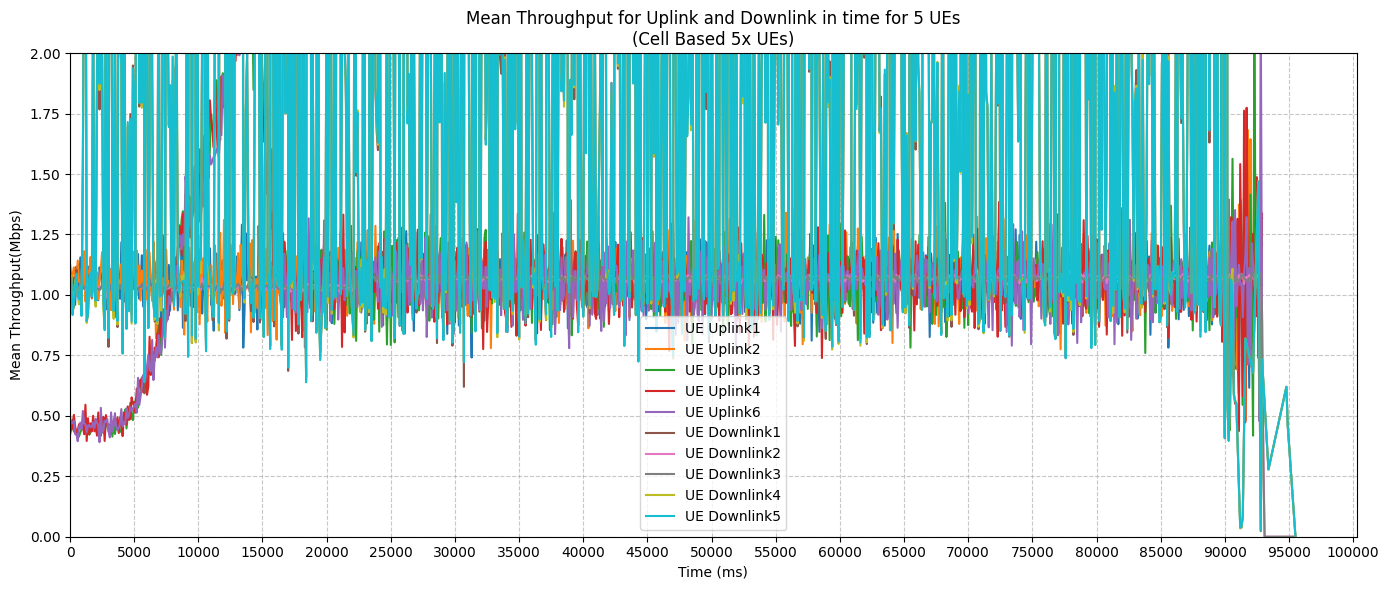

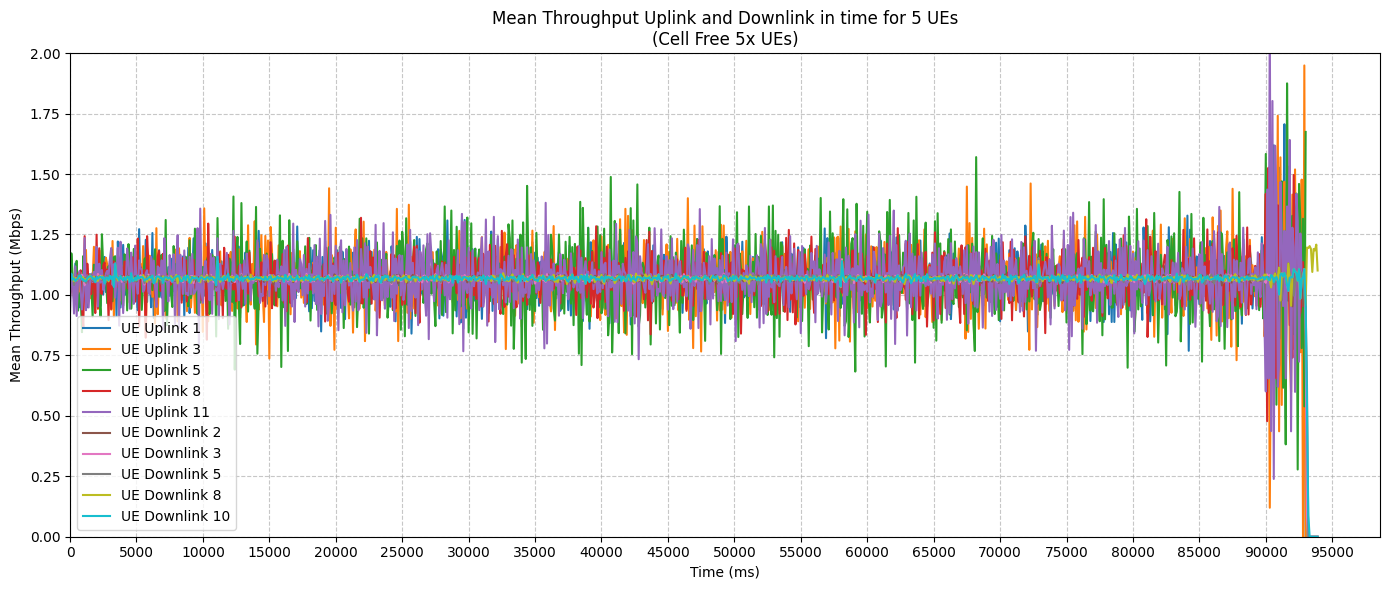

In [ ]:
plt.figure(figsize=(14, 6))

# Graphic of SEling Average
for ue, df in dfs_cb_5_ul.items():
    dfs_cb_5_ul[ue]["Mean_SE"] = dfs_cb_5_ul[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE Uplink {ue}")

for ue, df in dfs_cb_5_dl.items():
    dfs_cb_5_dl[ue]["Mean_SE"] = dfs_cb_5_dl[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE Downlink{ue}")

plt.title("Mean SEink and Downlink in time for 5 UEs\n(Cell Based 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean SE")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

# Graphic of SEling Average
for ue, df in dfs_cf_5_ul.items():
    dfs_cf_5_ul[ue]["Mean_SE"] = dfs_cf_5_ul[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE Uplink {ue}")

for ue, df in dfs_cf_5_dl.items():
    dfs_cf_5_dl[ue]["Mean_SE"] = dfs_cf_5_dl[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE Downlink {ue}")

plt.title("Mean SE Uplink and Downlink in time for 5 UEs\n(Cell Free 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean SE (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_cb_5_dl = pd.read_csv(cb_5x_dl)
df_cf_5_dl = pd.read_csv(cf_5x_dl)
df_cb_5_ul = pd.read_csv(cb_5x_ul)
df_cf_5_ul = pd.read_csv(cf_5x_ul)

print("\n-----Downlink-----\n")
print("\t -- Cell-Based -- ")
print(df_cb_5_dl["Mean_SE"].describe())
print("\t -- Cell-Free -- ")
print(df_cf_5_dl["Mean_SE"].describe())
print("\n-----Uplink-----\n")
print("\t -- Cell-Based -- ")
print(df_cb_5_ul["Mean_SE"].describe())
print("\t -- Cell-Free -- ")
print(df_cf_5_ul["Mean_SE"].describe())


-----Downlink-----

	 -- Cell-Based -- 
count    4678.000000
mean        1.833157
std         1.969325
min         0.000000
25%         1.030874
50%         1.070107
75%         1.924035
max        26.146125
Name: Mean_Throughput, dtype: float64
	 -- Cell-Free -- 
count    4695.000000
mean        1.060770
std         0.091021
min         0.000000
25%         1.063095
50%         1.068862
75%         1.074091
max         1.207510
Name: Mean_Throughput, dtype: float64

-----Uplink-----

	 -- Cell-Based -- 
count    4650.000000
mean        1.070289
std         0.233903
min         0.391193
25%         0.982282
50%         1.060701
75%         1.138828
max         2.586306
Name: Mean_Throughput, dtype: float64
	 -- Cell-Free -- 
count    4655.000000
mean        1.067742
std         0.127679
min         0.000000
25%         0.998039
50%         1.065986
75%         1.137435
max         2.153980
Name: Mean_Throughput, dtype: float64


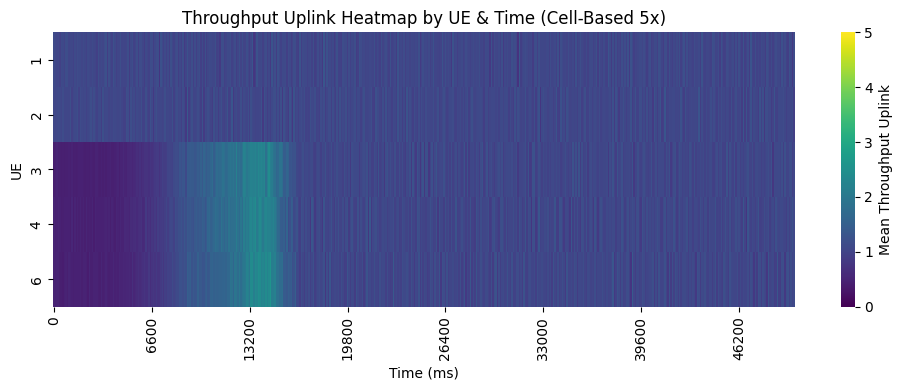

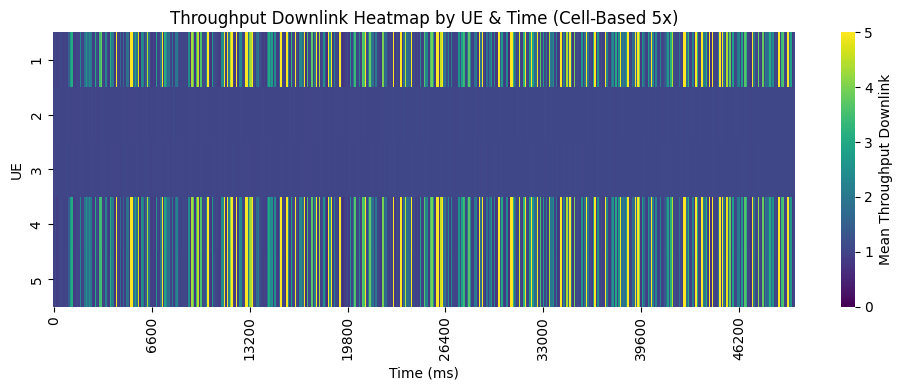

In [ ]:
heat_cb_ul = df_cb_5_ul.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf_ul = df_cf_5_ul.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cb_dl = df_cb_5_dl.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf_dl = df_cf_5_dl.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

vmin_val = 0
vmax_val = 5

# Plot Cell-Based
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cb_ul, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SEby UE & Time (Cell-Based 5x)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(heat_cb_dl, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SEk Heatmap by UE & Time (Cell-Based 5x)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

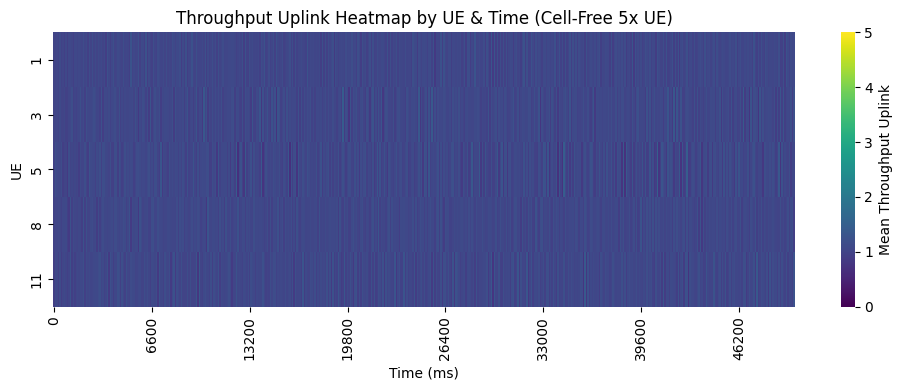

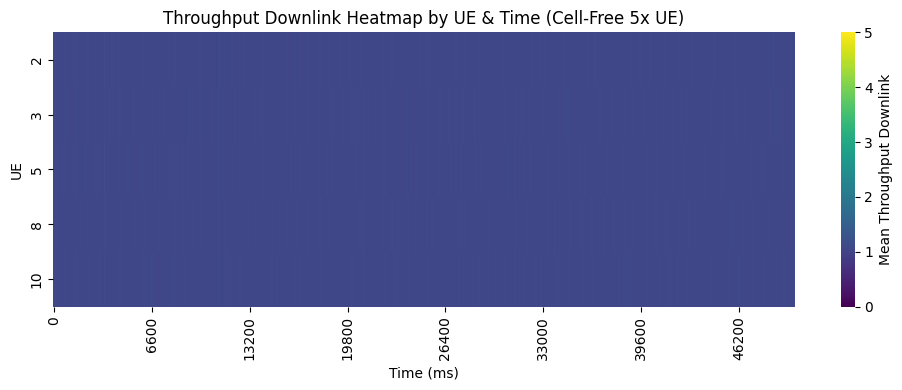

In [ ]:
vmin_val = 0
vmax_val = 5

# Plot Cell-Free
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cf_ul, cmap="viridis", cbar_kws={'label': 'Mean SE (bits/s/Hz)'},  vmin=vmin_val, vmax=vmax_val)
plt.title("SEby UE & Time (Cell-Free 5x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(heat_cf_dl, cmap="viridis", cbar_kws={'label': 'Mean SE (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SEk Heatmap by UE & Time (Cell-Free 5x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

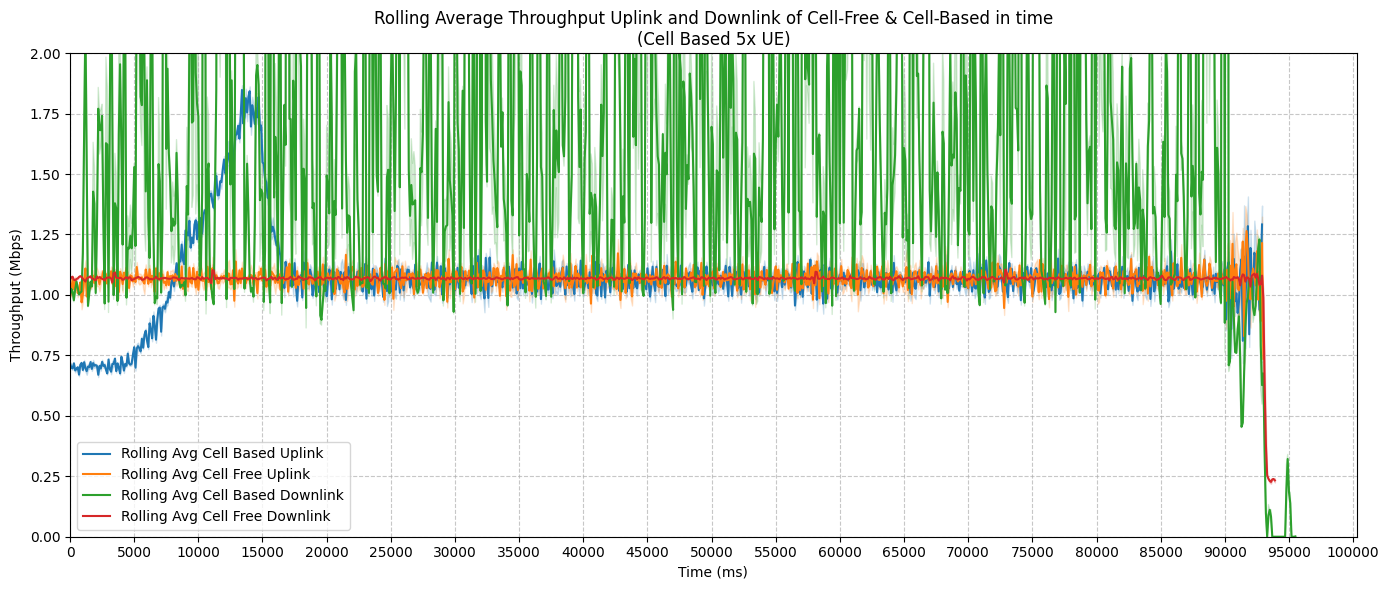

In [ ]:
# Round of SEto 3 decimal places
df_cb_5_ul["Mean_SE"] = df_cb_5_ul["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_5_ul["Rolling Avg (bits/s/Hz)"] = df_cb_5_ul["Mean_SE"].rolling(window=5).mean()

df_cf_5_ul["Mean_SE"] = df_cf_5_ul["Mean_SE"].round(3)
df_cf_5_ul["Rolling Avg (bits/s/Hz)"] = df_cf_5_ul["Mean_SE"].rolling(window=5).mean()

df_cb_5_dl["Mean_SE"] = df_cb_5_dl["Mean_SE"].round(3)
df_cb_5_dl["Rolling Avg (bits/s/Hz)"] = df_cb_5_dl["Mean_SE"].rolling(window=5).mean()

df_cf_5_dl["Mean_SE"] = df_cf_5_dl["Mean_SE"].round(3)
df_cf_5_dl["Rolling Avg (bits/s/Hz)"] = df_cf_5_dl["Mean_SE"].rolling(window=5).mean()


# Graphic of SEling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5_ul, label="Rolling Avg Cell Based Uplink")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5_ul, label="Rolling Avg Cell Free Uplink")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5_dl, label="Rolling Avg Cell Based Downlink")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5_dl, label="Rolling Avg Cell Free Downlink")
plt.title("Rolling Average SE and Downlink of Cell-Free & Cell-Based in time\n(Cell Based 5x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE (bits/s/Hz)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10X Scenarios

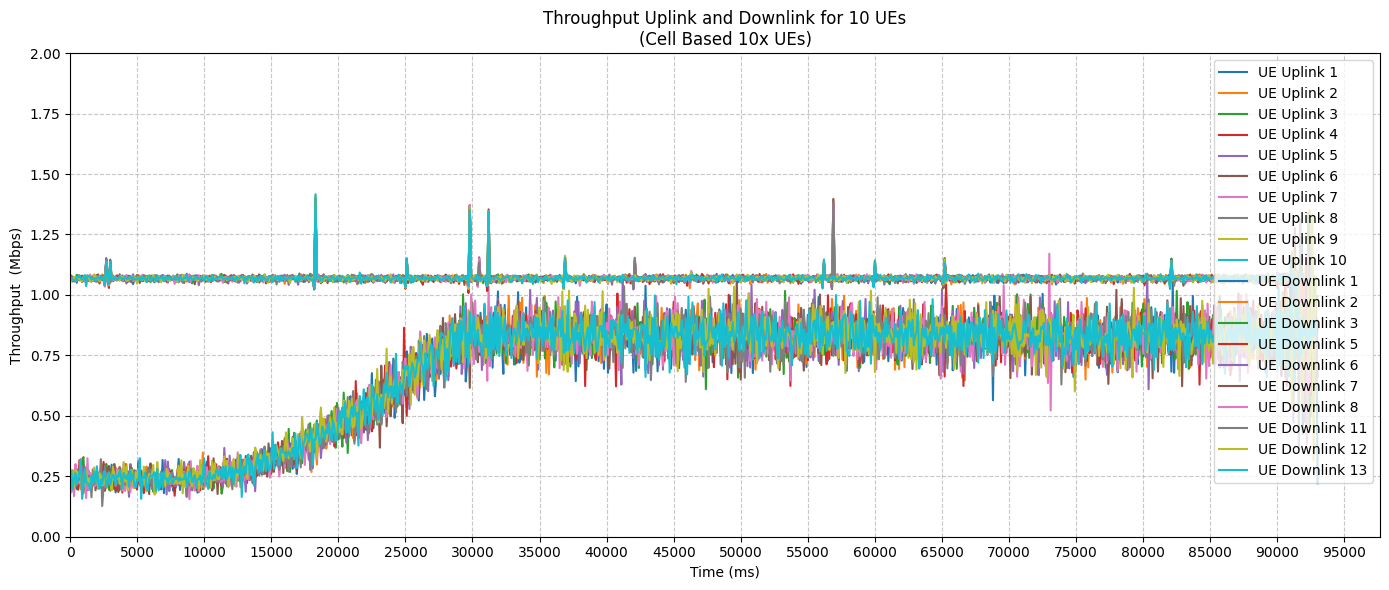

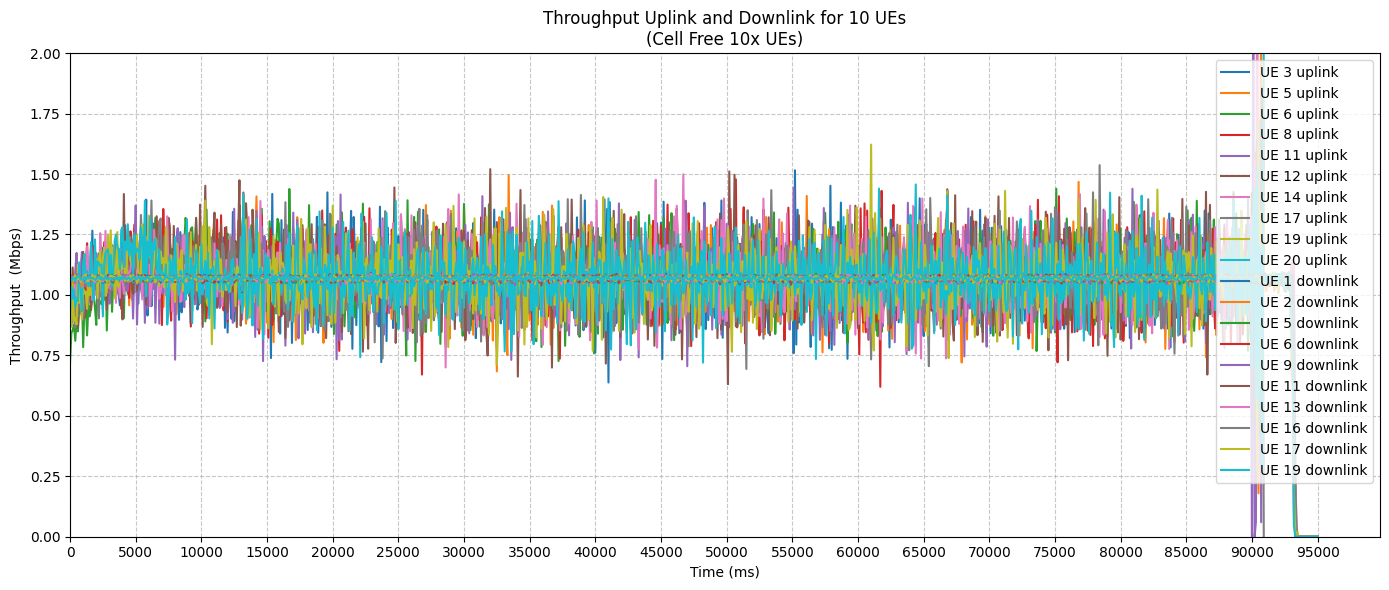

In [ ]:
# Graphic of SEling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb_10_ul.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE Uplink {ue}")

for ue, df in dfs_cb_10_dl.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE Downlink {ue}")

plt.title("SEand Downlink for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("SE")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Graphic of SEling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf_10_ul.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue} uplink")

for ue, df in dfs_cf_10_dl.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue} downlink")
plt.title("SE link for 10 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("SE")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_cb_10_dl = pd.read_csv(cb_10x_dl)
df_cf_10_dl = pd.read_csv(cf_10x_dl)
df_cb_10_ul = pd.read_csv(cb_10x_ul)
df_cf_10_ul = pd.read_csv(cf_10x_ul)


print("\n-----Downlink-----\n")
print("\t -- Cell-Based -- ")
print(df_cb_10_dl["Mean_SE"].describe())
print("\t -- Cell-Free -- ")
print(df_cf_10_dl["Mean_SE"].describe())
print("\n-----Uplink-----\n")
print("\t -- Cell-Based -- ")
print(df_cb_10_ul["Mean_SE"].describe())
print("\t -- Cell-Free -- ")
print(df_cf_10_ul["Mean_SE"].describe())


-----Downlink-----

	 -- Cell-Based -- 
count    9190.000000
mean        1.069624
std         0.020694
min         0.956690
25%         1.063490
50%         1.068959
75%         1.074178
max         1.416601
Name: Mean_Throughput, dtype: float64
	 -- Cell-Free -- 
count    9500.000000
mean        1.049481
std         0.144697
min         0.000000
25%         1.062920
50%         1.068809
75%         1.073936
max         1.437136
Name: Mean_Throughput, dtype: float64

-----Uplink-----

	 -- Cell-Based -- 
count    9305.000000
mean        0.694961
std         0.237921
min         0.126890
25%         0.559074
50%         0.794759
75%         0.858258
max         1.351085
Name: Mean_Throughput, dtype: float64
	 -- Cell-Free -- 
count    9100.000000
mean        1.072843
std         0.136698
min         0.000000
25%         0.987553
50%         1.071210
75%         1.157609
max         2.623100
Name: Mean_Throughput, dtype: float64


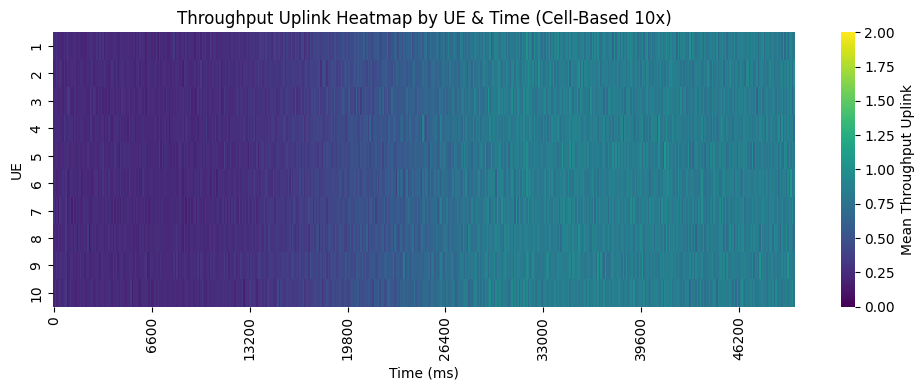

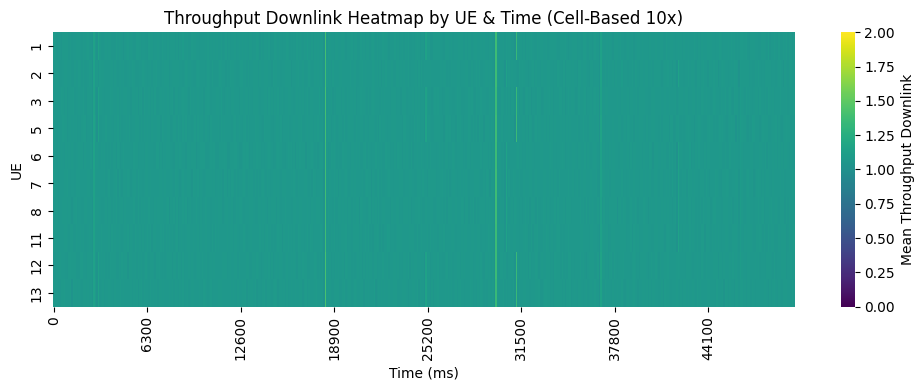

In [ ]:

heat_cb_ul = df_cb_10_ul.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf_ul = df_cf_10_ul.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cb_dl = df_cb_10_dl.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf_dl = df_cf_10_dl.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

vmin_val = 0
vmax_val = 2

# Plot Cell-Based
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cb_ul, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SE Uplink Heatmap by UE & Time (Cell-Based 10x)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(heat_cb_dl, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'}, vmin=vmin_val, vmax=vmax_val)
plt.title("SE Downlink Heatmap by UE & Time (Cell-Based 10x)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

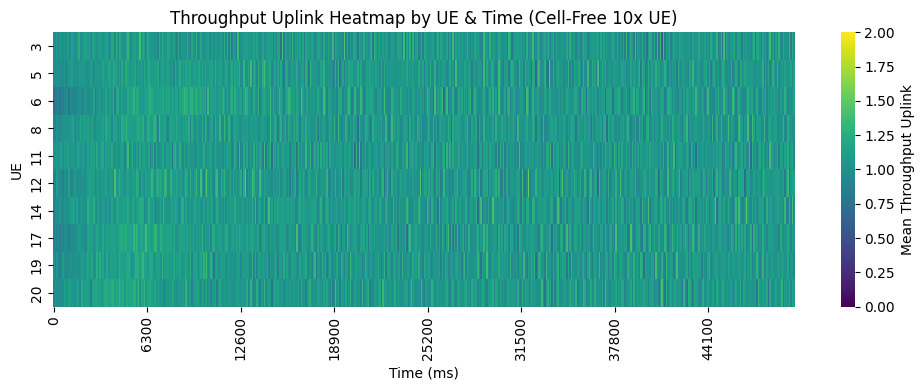

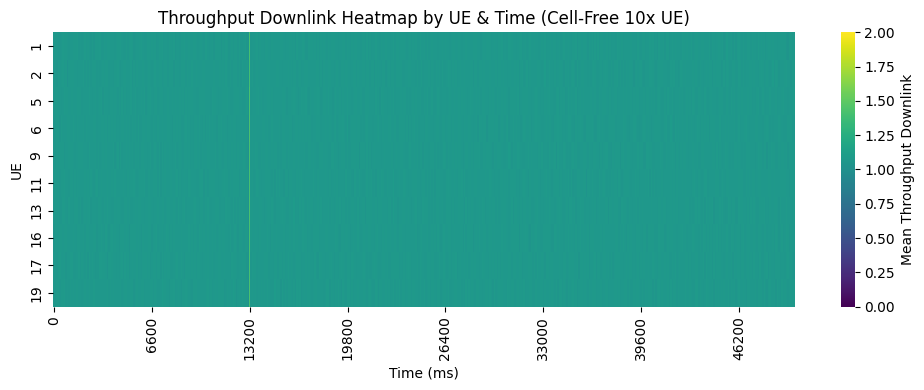

In [ ]:
vmin_val = 0
vmax_val = 2

# Plot Cell-Free
plt.figure(figsize=(10, 4))
sns.heatmap(heat_cf_ul, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bits/s/Hz)'},  vmin=vmin_val, vmax=vmax_val)
plt.title("SE Uplink Heatmap by UE & Time (Cell-Free 10x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(heat_cf_dl, cmap="viridis", cbar_kws={'label': 'Mean SE Downlink (bits/s/Hz)'},  vmin=vmin_val, vmax=vmax_val)
plt.title("SE Downlink Heatmap by UE & Time (Cell-Free 10x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

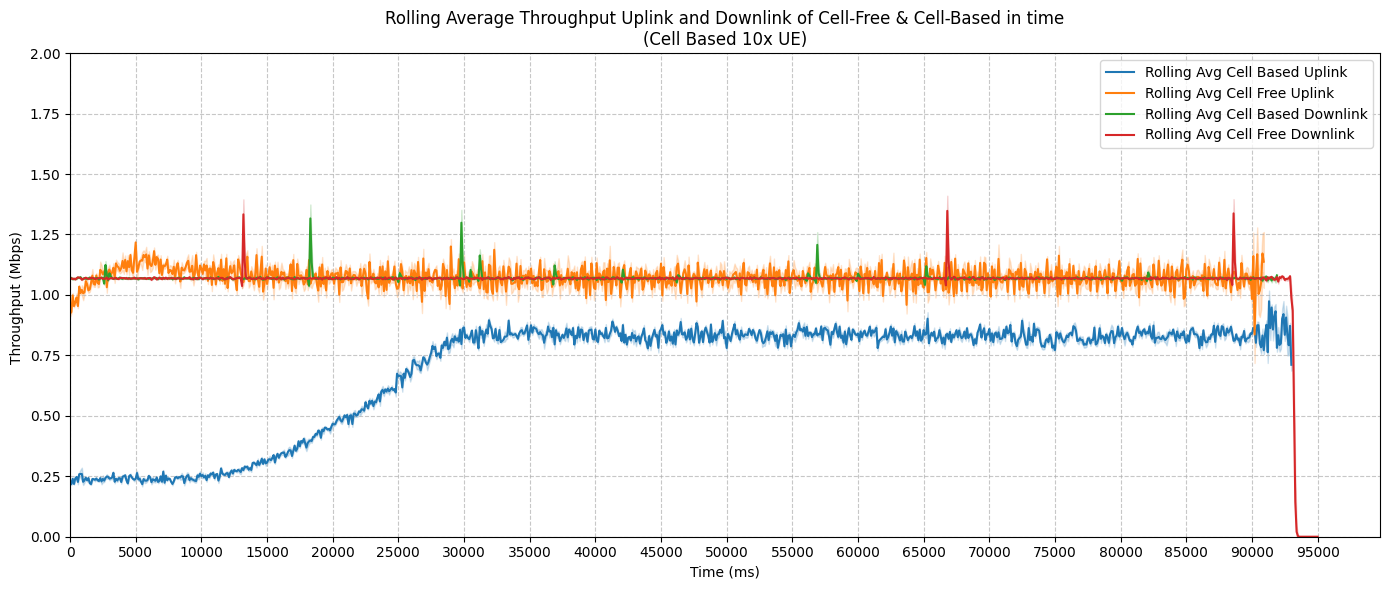

In [ ]:
# Round of SE values to 3 decimal places
df_cb_10_ul["Mean_SE"] = df_cb_10_ul["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_10_ul["Rolling Avg (bits/s/Hz)"] = df_cb_10_ul["Mean_SE"].rolling(window=5).mean()

df_cf_10_ul["Mean_SE"] = df_cf_10_ul["Mean_SE"].round(3)
df_cf_10_ul["Rolling Avg (bits/s/Hz)"] = df_cf_10_ul["Mean_SE"].rolling(window=5).mean()

df_cb_10_dl["Mean_SE"] = df_cb_10_dl["Mean_SE"].round(3)
df_cb_10_dl["Rolling Avg (bits/s/Hz)"] = df_cb_10_dl["Mean_SE"].rolling(window=5).mean()

df_cf_10_dl["Mean_SE"] = df_cf_10_dl["Mean_SE"].round(3)
df_cf_10_dl["Rolling Avg (bits/s/Hz)"] = df_cf_10_dl["Mean_SE"].rolling(window=5).mean()


# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10_ul, label="Rolling Avg Cell Based Uplink")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10_ul, label="Rolling Avg Cell Free Uplink")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10_dl, label="Rolling Avg Cell Based Downlink")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10_dl, label="Rolling Avg Cell Free Downlink")
plt.title("Rolling Average SE Uplink and Downlink of Cell-Free & Cell-Based in time\n(Cell Based 10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE (bits/s/Hz) ")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# All Datasets

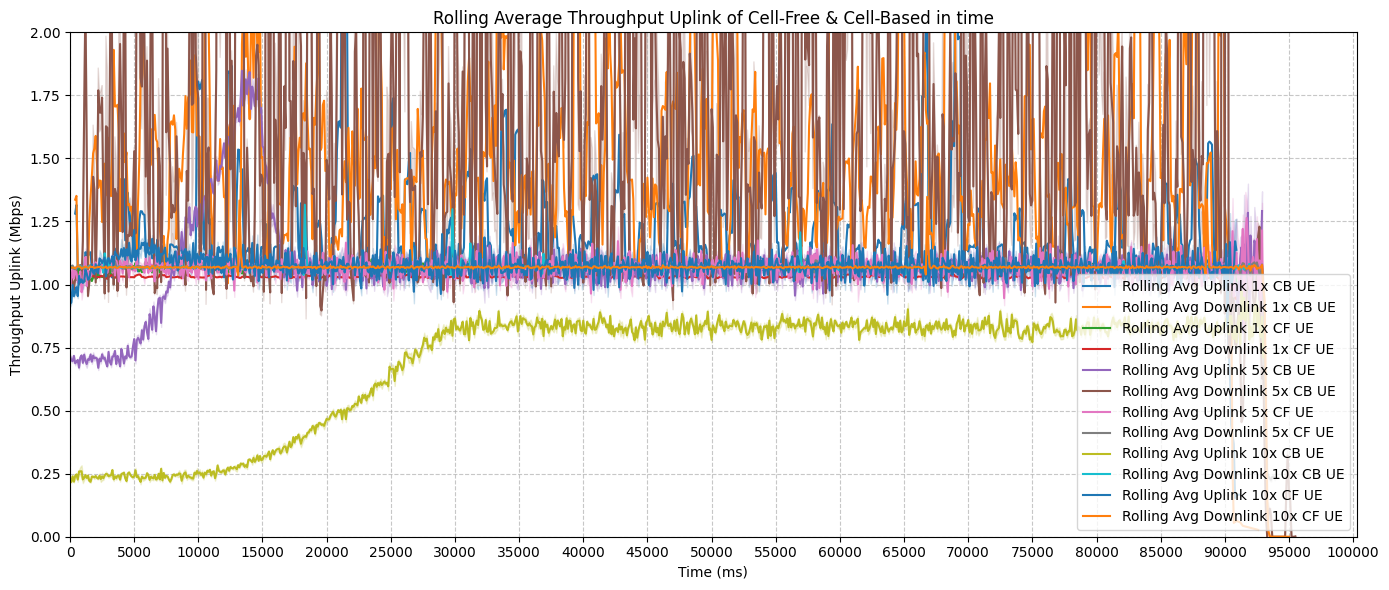

In [ ]:
df_cb_1_ul["Mean_SE"] = df_cb_1_ul["Mean_SE"].round(3)
df_cb_1_ul["Rolling Avg (bits/s/Hz)"] = df_cb_1_ul["Mean_SE"].rolling(window=5).mean()
df_cb_1_dl["Mean_SE"] = df_cb_1_dl["Mean_SE"].round(3)
df_cb_1_dl["Rolling Avg (bits/s/Hz)"] = df_cb_1_dl["Mean_SE"].rolling(window=5).mean()

df_cf_1_ul["Mean_SE"] = df_cf_1_ul["Mean_SE"].round(3)
df_cf_1_ul["Rolling Avg (bits/s/Hz)"] = df_cf_1_ul["Mean_SE"].rolling(window=5).mean()
df_cf_1_dl["Mean_SE"] = df_cf_1_dl["Mean_SE"].round(3)
df_cf_1_dl["Rolling Avg (bits/s/Hz)"] = df_cf_1_dl["Mean_SE"].rolling(window=5).mean()


df_cb_5_ul["Mean_SE"] = df_cb_5_ul["Mean_SE"].round(3)
df_cb_5_ul["Rolling Avg (bits/s/Hz)"] = df_cb_5_ul["Mean_SE"].rolling(window=5).mean()
df_cf_5_ul["Mean_SE"] = df_cf_5_ul["Mean_SE"].round(3)
df_cf_5_ul["Rolling Avg (bits/s/Hz)"] = df_cf_5_ul["Mean_SE"].rolling(window=5).mean()

df_cb_5_dl["Mean_SE"] = df_cb_5_dl["Mean_SE"].round(3)
df_cb_5_dl["Rolling Avg (bits/s/Hz)"] = df_cb_5_dl["Mean_SE"].rolling(window=5).mean()
df_cf_5_dl["Mean_SE"] = df_cf_5_dl["Mean_SE"].round(3)
df_cf_5_dl["Rolling Avg (bits/s/Hz)"] = df_cf_5_dl["Mean_SE"].rolling(window=5).mean()


df_cb_10_ul["Mean_SE"] = df_cb_10_ul["Mean_SE"].round(3)
df_cb_10_ul["Rolling Avg (bits/s/Hz)"] = df_cb_10_ul["Mean_SE"].rolling(window=5).mean()
df_cf_10_ul["Mean_SE"] = df_cf_10_ul["Mean_SE"].round(3)
df_cf_10_ul["Rolling Avg (bits/s/Hz)"] = df_cf_10_ul["Mean_SE"].rolling(window=5).mean()

df_cb_10_dl["Mean_SE"] = df_cb_10_dl["Mean_SE"].round(3)
df_cb_10_dl["Rolling Avg (bits/s/Hz)"] = df_cb_10_dl["Mean_SE"].rolling(window=5).mean()
df_cf_10_dl["Mean_SE"] = df_cf_10_dl["Mean_SE"].round(3)
df_cf_10_dl["Rolling Avg (bits/s/Hz)"] = df_cf_10_dl["Mean_SE"].rolling(window=5).mean()

# Graphic of SE and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1_ul, label="Rolling Avg Uplink 1x CB UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1_dl, label="Rolling Avg Downlink 1x CB UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1_ul, label="Rolling Avg Uplink 1x CF UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1_dl, label="Rolling Avg Downlink 1x CF UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5_ul, label="Rolling Avg Uplink 5x CB UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5_dl, label="Rolling Avg Downlink 5x CB UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5_ul, label="Rolling Avg Uplink 5x CF UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5_dl, label="Rolling Avg Downlink 5x CF UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10_ul, label="Rolling Avg Uplink 10x CB UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10_dl, label="Rolling Avg Downlink 10x CB UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10_ul, label="Rolling Avg Uplink 10x CF UE")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10_dl, label="Rolling Avg Downlink 10x CF UE")
plt.title("Rolling Average SE Uplink of Cell-Free & Cell-Based in time")
plt.xlabel("Time (ms)")
plt.ylabel("SE Uplink (bits/s/Hz)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Stats

## Mean SE Uplink (bits/s/Hz)

| Métrica      | CB (1x UEs) | CF (1x UEs) | CB (5x UEs) | CF (5x UEs) | CB (10x UEs) | CF (10x UEs) |
|--------------|-----------|-----------|-------------|-------------|--------------|--------------|
| Count        | 907       | 1215      | 4650        | 4655        | 10334        | 9100         |
| Mean         | 1.191     | 0.799     | 1.070       | 1.068       | 0.970        | 1.073        |
| Std          | 0.445     | 0.469     | 0.234       | 0.128       | 0.604        | 0.137        |
| Min          | 0.000     | 0.000     | 0.391       | 0.000       | 0.000        | 0.000        |
| 25%          | 1.036     | 0.000     | 0.982       | 0.998       | 0.793        | 0.988        |
| 50% (Median) | 1.073     | 1.039     | 1.061       | 1.066       | 0.969        | 1.071        |
| 75%          | 1.129     | 1.099     | 1.139       | 1.137       | 1.109        | 1.158        |
| Max          | 5.880     | 1.401     | 2.586       | 2.154       | 16.889       | 2.623        |


## Requirements

|                | VM RAN    | VM CN     | VM UEs      |  VM FlexRIC | 
|--------------  |-----------|-----------|-------------|-------------|
| CPU            | 12        | 2         | 14          | 4           | 
| RAM (GiB)      | 24        | 2         | 20          | 6           | 
| Storage  (GiB) | 76        | 25        | 50          | 50          | 
